In [1]:
using Markdown
using InteractiveUtils

In [2]:
using Pkg
Pkg.activate("/global/u2/a/aramreye/RamirezReyes_Yang_2020_SpontaneousCyclogenesis")
using PyPlot
using PyCall
using Base64
using Printf
using NCDatasets
using Statistics
using AvailablePotentialEnergyFramework
using JLD
using DelimitedFiles
using LaTeXStrings
using Colors

 Activating environment at `/global/u2/a/aramreye/RamirezReyes_Yang_2020_SpontaneousCyclogenesis/Project.toml`


In [3]:
function filter_n_times(x,smooth_time,n)
	if n <= 1
		return filter_array_time(x,smooth_time,1)
	else
        for ii in n:-1:1
 	          x=filter_array_time(x,smooth_time,1)
         end
	end
           x
end

filter_n_times (generic function with 1 method)

In [4]:
tkr = pyimport("matplotlib.ticker")# import FormatStrFormatter

PyObject <module 'matplotlib.ticker' from '/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/matplotlib/ticker.py'>

In [5]:
function wong_colors(alpha = 1.0)
    colors = [
        RGB(0/255, 0/255, 0/255), # black
        RGB(230/255, 159/255, 0/255), # orange
        RGB(86/255, 180/255, 233/255), # blue        
        RGB(0/255, 158/255, 115/255), # green
        RGB(240/255, 228/255, 66/255), # yellow
        RGB(0/255, 114/255, 178/255), # blue
        RGB(213/255, 94/255, 0/255), # vermillion
        RGB(204/255, 121/255, 167/255), # reddish purple
    ]
#    @. RGB(red(colors), green(colors), blue(colors))
end

wong_colors (generic function with 2 methods)

In [6]:
wong_colors()

In [7]:
#default_cycler = PyPlot.matplotlib.rcsetup.cycler(color=["#006BA4", "#FF800E", "#ABABAB", "#595959", "#5F9ED1", "#C85200", "#898989", "#A2C8EC", "#FFBC79", "#CFCFCF"]) + PyPlot.matplotlib.rcsetup.cycler(linestyle=["-", "--", "-.","-", "--", "-.", "-", "--", "-.","-"])
#PyPlot.rc("axes",prop_cycle=default_cycler)

In [8]:
default_cycler = PyPlot.matplotlib.rcsetup.cycler(color=hex.(repeat(wong_colors(),3))) + PyPlot.matplotlib.rcsetup.cycler(linestyle=repeat(["-", "--", "-."],8))
PyPlot.rc("axes",prop_cycle=default_cycler)

In [9]:
data_dir = "$(ENV["SCRATCH"])/for_postprocessing/largencfiles/"
output_dir = "/global/u2/a/aramreye/RamirezReyes_Yang_2020_SpontaneousCyclogenesis/plotsandanimations/"
csv_dir = "/global/u2/a/aramreye/RamirezReyes_Yang_2020_SpontaneousCyclogenesis/plots_notebooks/"

"/global/u2/a/aramreye/RamirezReyes_Yang_2020_SpontaneousCyclogenesis/plots_notebooks/"

In [11]:
function get_timeseries(file_path)
 	ds = Dataset(file_path)
	pres = variable(ds,"PSFC")[:,:,:] :: Array{Float32,3}
	u = variable(ds,"USFC")[:,:,:] :: Array{Float32,3}
	v = variable(ds,"VSFC")[:,:,:] :: Array{Float32,3}
	sp = hypot.(u,v)
	min_pres = dropdims(minimum(pres,dims=(1,2)),dims=(1,2))
	max_speed = dropdims(maximum(sp,dims=(1,2)),dims=(1,2))
	close(ds)
    return (min_pres,max_speed)
end

function get_timeseries_2days(file_path)
 	ds = Dataset(file_path)
	pres = variable(ds,"PSFC")[:,:,1:24] :: Array{Float32,3}
	u = variable(ds,"USFC")[:,:,1:24] :: Array{Float32,3}
	v = variable(ds,"VSFC")[:,:,1:24] :: Array{Float32,3}
	sp = hypot.(u,v)
	min_pres = dropdims(minimum(pres,dims=(1,2)),dims=(1,2))
	max_speed = dropdims(maximum(sp,dims=(1,2)),dims=(1,2))
	close(ds)
    return (min_pres,max_speed)
end

get_timeseries_2days (generic function with 1 method)

In [11]:
pres_homoRad_homoSfc_control,sp_homoRad_homoSfc_control = get_timeseries(joinpath(data_dir,"f5e-4_2km_1000km_homoRad_homoSfc_2d.nc"));

In [12]:
pres_homoRad_homoSfc_ens1,sp_homoRad_homoSfc_ens1 = get_timeseries(joinpath(data_dir,"f5e-4_2km_1000km_homoRad_homoSfc_ensemble1_2d.nc"));

In [13]:
pres_homoRad_homoSfc_ens2,sp_homoRad_homoSfc_ens2 = get_timeseries(joinpath(data_dir,"f5e-4_2km_1000km_homoRad_homoSfc_ensemble2_2d.nc"));;

In [14]:
pres_homoRad_homoSfc_rrtm,sp_homoRad_homoSfc_rrtm = get_timeseries(joinpath(data_dir,"f5e-4_2km_1000km_homoRad_homoSfc_RRTM_2d.nc"));

In [15]:
pres_homoRad_homoSfc_thom,sp_homoRad_homoSfc_thom = get_timeseries(joinpath(data_dir,"f5e-4_2km_1000km_homoRad_homoSfc_MICRO_THOM_2d.nc"));

In [16]:
pres_homoRad_homoSfc_297K,sp_homoRad_homoSfc_297K = get_timeseries(joinpath(data_dir,"f5e-4_2km_1000km_homoRad_homoSfc_297K_2d.nc"));

In [17]:
pres_homoRad_homoSfc_f3,sp_homoRad_homoSfc_f3 = get_timeseries(joinpath(data_dir,"f3e-4_2km_1000km_homoRad_homoSfc_2d.nc"));

In [18]:
pres_homoRad_homoSfc_f1,sp_homoRad_homoSfc_f1 = get_timeseries(joinpath(data_dir,"f1e-4_2km_1000km_homoRad_homoSfc_2d.nc"));

In [19]:
pres_homoRad_homoSfc_305K,sp_homoRad_homoSfc_305K = get_timeseries(joinpath(data_dir,"f5e-4_2km_1000km_homoRad_homoSfc_305K_2d.nc"));

In [38]:
GC.gc()

In [39]:
pres_homoRad_homoSfc_1km,sp_homoRad_homoSfc_1km = get_timeseries(joinpath(data_dir,"f5e-4_1km_1000km_homoRad_homoSfc_2d.nc"));

In [29]:
pres_homoRad_homoSfc_nonudge,sp_homoRad_homoSfc_nonudge = get_timeseries(joinpath(data_dir,"f5e-4_2km_1000km_homoRad_homoSfc_nonudge_2d.nc"));

In [30]:
times = Dataset(joinpath(data_dir,"f5e-4_2km_1000km_homoRad_homoSfc_2d.nc")) do ds
	variable(ds,"time")[:]
    end;

In [40]:
ensemble_length = length(sp_homoRad_homoSfc_ens1)
pres_ensemble_mean = Array{Float32,1}(undef,ensemble_length)
pres_ensemble_max = similar(pres_ensemble_mean)
pres_ensemble_min = similar(pres_ensemble_mean)
sp_ensemble_mean = Array{Float32,1}(undef,ensemble_length)
sp_ensemble_max = similar(pres_ensemble_mean)
sp_ensemble_min = similar(pres_ensemble_mean);

In [41]:
for timeindex in 1:ensemble_length
	pres_ensemble_mean[timeindex] = mean([pres_homoRad_homoSfc_control[timeindex],pres_homoRad_homoSfc_ens1[timeindex],pres_homoRad_homoSfc_ens2[timeindex]])
	pres_ensemble_max[timeindex] = max(pres_homoRad_homoSfc_control[timeindex],pres_homoRad_homoSfc_ens1[timeindex],pres_homoRad_homoSfc_ens2[timeindex])
	pres_ensemble_min[timeindex] = min(pres_homoRad_homoSfc_control[timeindex],pres_homoRad_homoSfc_ens1[timeindex],pres_homoRad_homoSfc_ens2[timeindex])
	sp_ensemble_mean[timeindex] = mean([sp_homoRad_homoSfc_control[timeindex],sp_homoRad_homoSfc_ens1[timeindex],sp_homoRad_homoSfc_ens2[timeindex]])
	sp_ensemble_max[timeindex] = max(sp_homoRad_homoSfc_control[timeindex],sp_homoRad_homoSfc_ens1[timeindex],sp_homoRad_homoSfc_ens2[timeindex])
	sp_ensemble_min[timeindex] = min(sp_homoRad_homoSfc_control[timeindex],sp_homoRad_homoSfc_ens1[timeindex],sp_homoRad_homoSfc_ens2[timeindex])
end

In [42]:
varinfo()

| name                         |      size | summary                       |
|:---------------------------- | ---------:|:----------------------------- |
| Base                         |           | Module                        |
| Core                         |           | Module                        |
| Main                         |           | Module                        |
| ax                           |  72 bytes | 2-element Array{PyObject,1}   |
| csv_dir                      |  93 bytes | String                        |
| data_dir                     |  70 bytes | String                        |
| default_cycler               |   8 bytes | PyObject                      |
| ensemble_length              |   8 bytes | Int64                         |
| fig                          |  16 bytes | Figure                        |
| filter_n_times               |   0 bytes | typeof(filter_n_times)        |
| get_timeseries               |   0 bytes | typeof(get_timeseries)        |
| lw                           |   8 bytes | Float64                       |
| output_dir                   |  96 bytes | String                        |
| p1                           |   8 bytes | PyObject                      |
| p10                          |  56 bytes | 1-element Array{PyObject,1}   |
| p2                           |   8 bytes | PyObject                      |
| p3                           |  56 bytes | 1-element Array{PyObject,1}   |
| p4                           |  56 bytes | 1-element Array{PyObject,1}   |
| p5                           |  56 bytes | 1-element Array{PyObject,1}   |
| p6                           |  56 bytes | 1-element Array{PyObject,1}   |
| p7                           |  56 bytes | 1-element Array{PyObject,1}   |
| p8                           |  56 bytes | 1-element Array{PyObject,1}   |
| pres_ensemble_max            | 4.727 KiB | 1200-element Array{Float32,1} |
| pres_ensemble_mean           | 4.727 KiB | 1200-element Array{Float32,1} |
| pres_ensemble_min            | 4.727 KiB | 1200-element Array{Float32,1} |
| pres_homoRad_homoSfc_1km     | 2.852 KiB | 720-element Array{Float32,1}  |
| pres_homoRad_homoSfc_297K    | 9.414 KiB | 2400-element Array{Float32,1} |
| pres_homoRad_homoSfc_305K    | 9.414 KiB | 2400-element Array{Float32,1} |
| pres_homoRad_homoSfc_control | 9.414 KiB | 2400-element Array{Float32,1} |
| pres_homoRad_homoSfc_ens1    | 4.727 KiB | 1200-element Array{Float32,1} |
| pres_homoRad_homoSfc_ens2    | 4.727 KiB | 1200-element Array{Float32,1} |
| pres_homoRad_homoSfc_f1      | 9.414 KiB | 2400-element Array{Float32,1} |
| pres_homoRad_homoSfc_f3      | 9.414 KiB | 2400-element Array{Float32,1} |
| pres_homoRad_homoSfc_nonudge | 4.727 KiB | 1200-element Array{Float32,1} |
| pres_homoRad_homoSfc_rrtm    | 9.414 KiB | 2400-element Array{Float32,1} |
| pres_homoRad_homoSfc_thom    | 9.414 KiB | 2400-element Array{Float32,1} |
| sp_ensemble_max              | 4.727 KiB | 1200-element Array{Float32,1} |
| sp_ensemble_mean             | 4.727 KiB | 1200-element Array{Float32,1} |
| sp_ensemble_min              | 4.727 KiB | 1200-element Array{Float32,1} |
| sp_homoRad_homoSfc_1km       | 2.852 KiB | 720-element Array{Float32,1}  |
| sp_homoRad_homoSfc_297K      | 9.414 KiB | 2400-element Array{Float32,1} |
| sp_homoRad_homoSfc_305K      | 9.414 KiB | 2400-element Array{Float32,1} |
| sp_homoRad_homoSfc_control   | 9.414 KiB | 2400-element Array{Float32,1} |
| sp_homoRad_homoSfc_ens1      | 4.727 KiB | 1200-element Array{Float32,1} |
| sp_homoRad_homoSfc_ens2      | 4.727 KiB | 1200-element Array{Float32,1} |
| sp_homoRad_homoSfc_f1        | 9.414 KiB | 2400-element Array{Float32,1} |
| sp_homoRad_homoSfc_f3        | 9.414 KiB | 2400-element Array{Float32,1} |
| sp_homoRad_homoSfc_nonudge   | 4.727 KiB | 1200-element Array{Float32,1} |
| sp_homoRad_homoSfc_rrtm      | 9.414 KiB | 2400-element Array{Float32,1} |
| sp_homoRad_homoSfc_thom      | 9.414 KiB | 2400-element Array{Float32,1} |
| time_smooth                  |   8 bytes | Int64                         |
| times                        | 9.414 KiB | 2400-element Array{Float32,1} |
| times_to_smooth              |   8 bytes | Int64                         |
| tkr                          |   8 bytes | PyObject                      |
| wong_colors                  |   0 bytes | typeof(wong_colors)           |


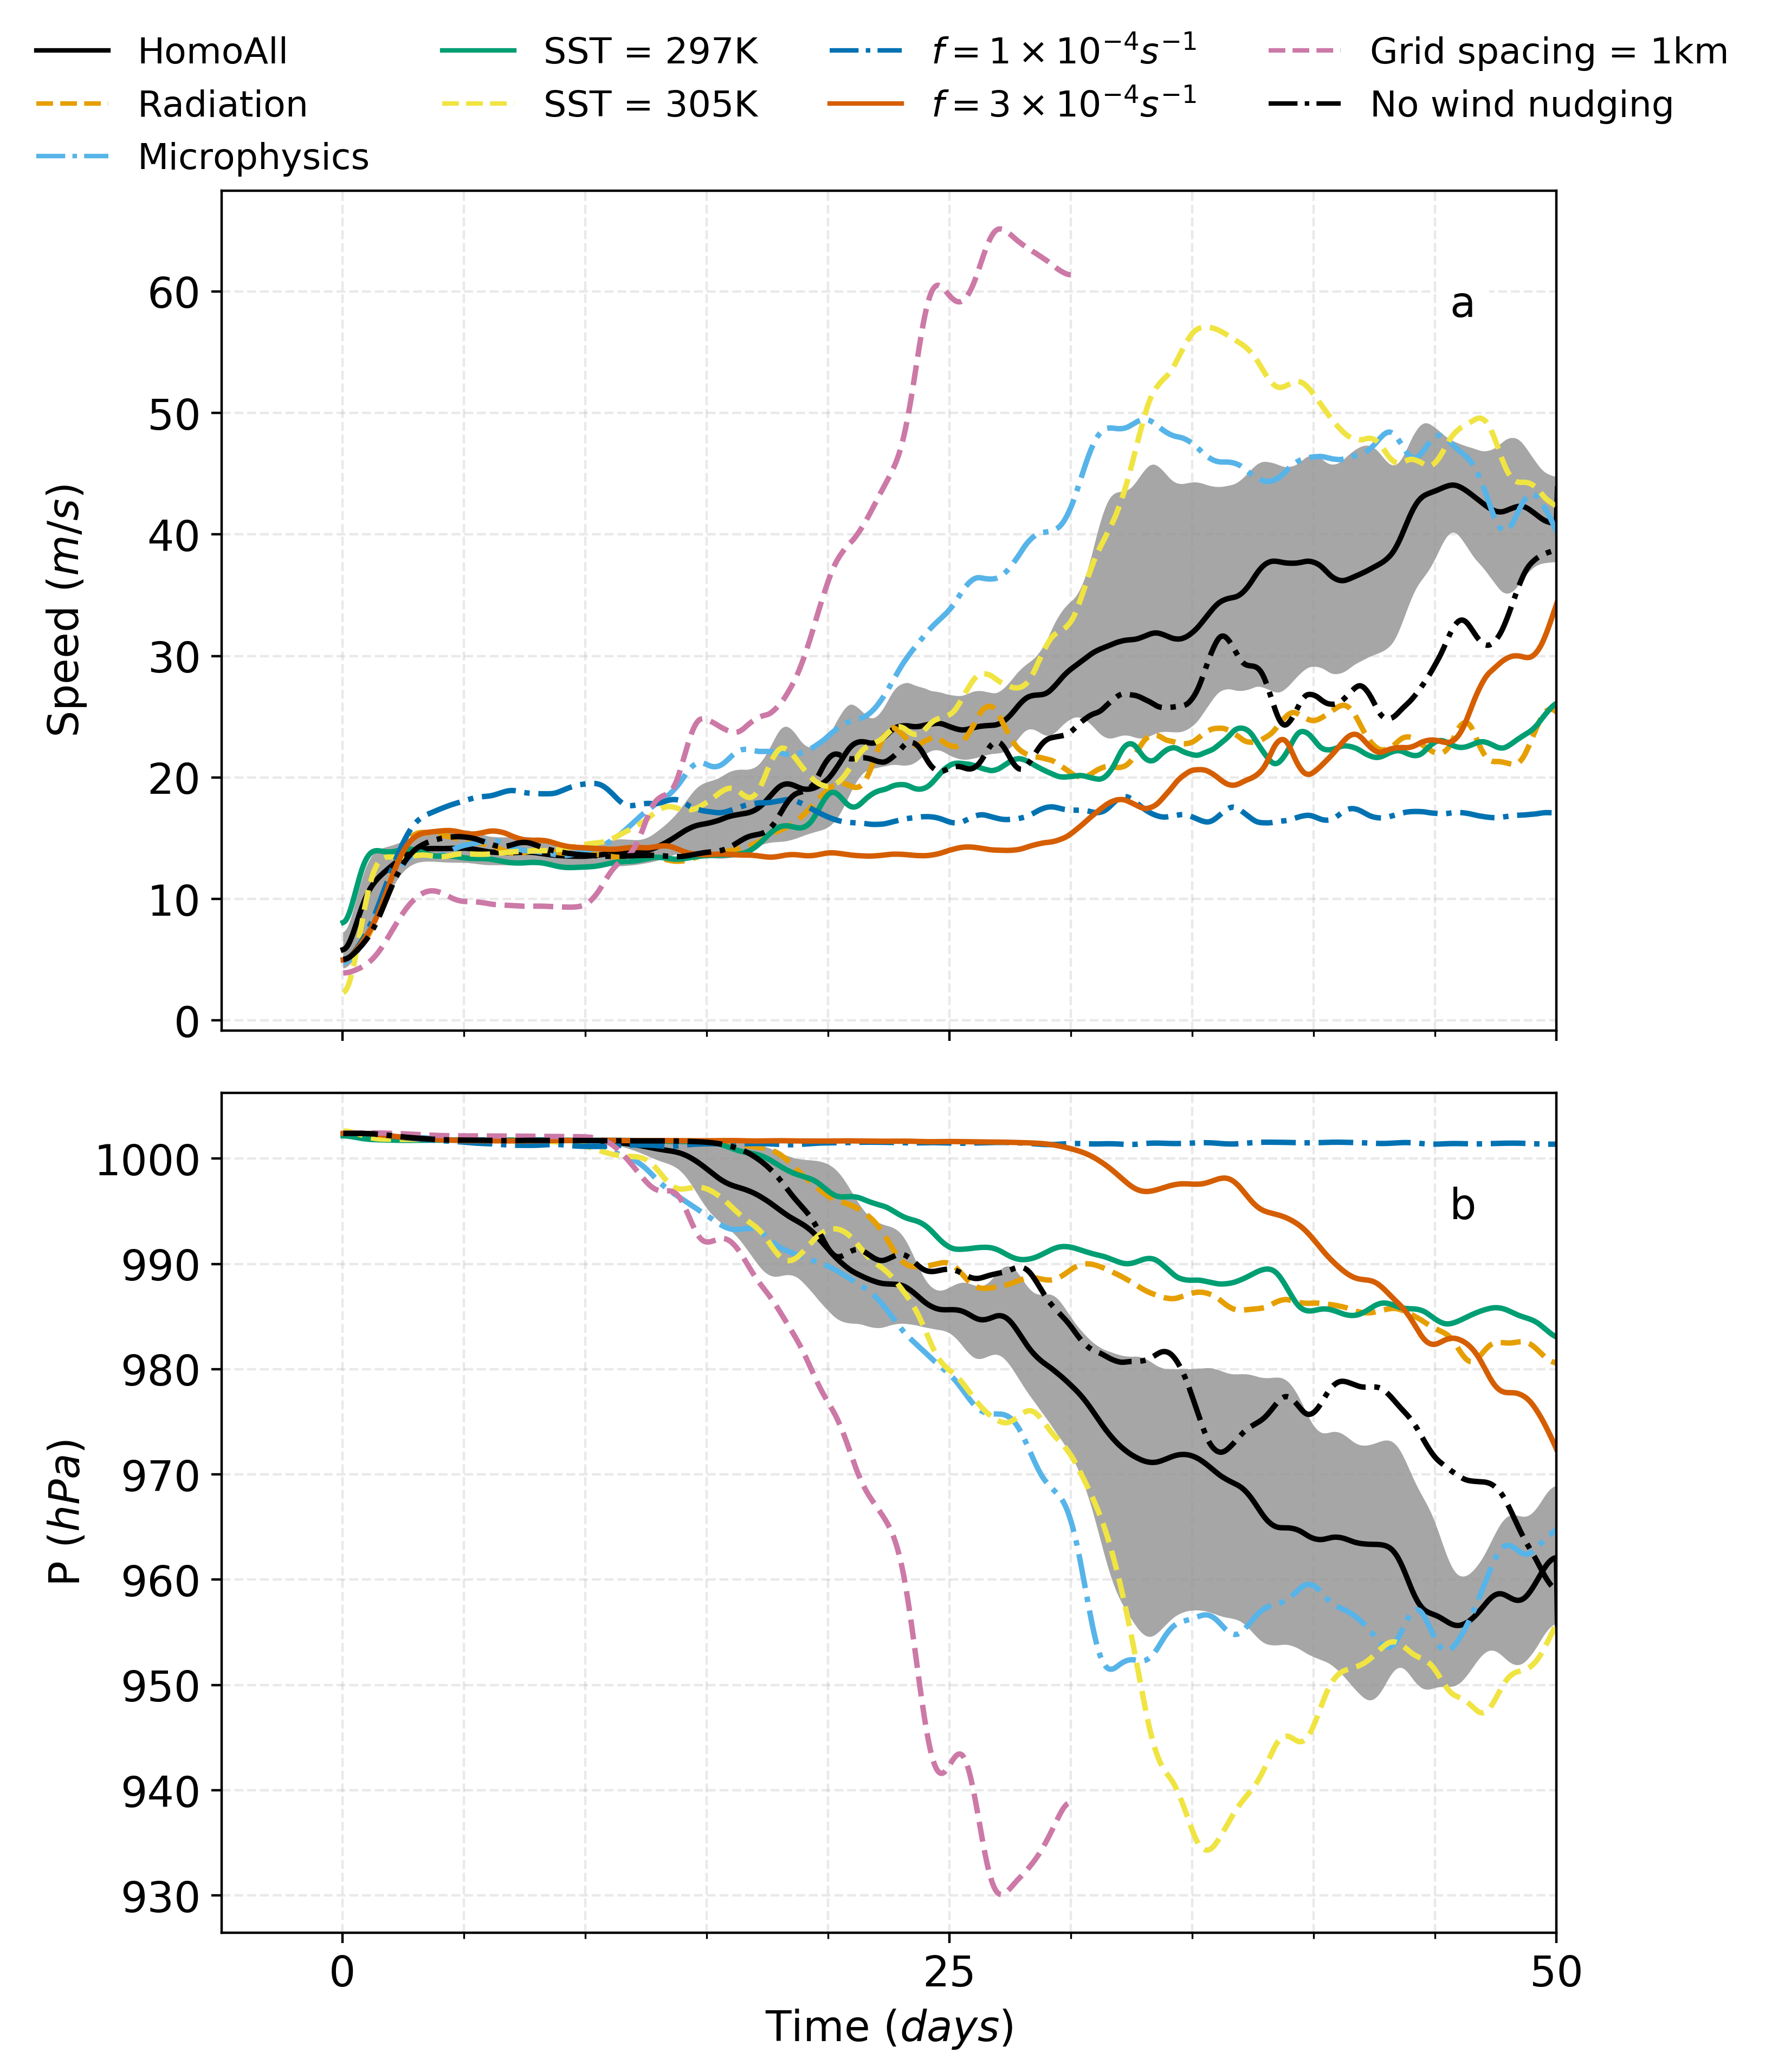

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

In [53]:
PyPlot.matplotlib.rc("font", family="sans-serif",size=14)
time_smooth = 21 #21
times_to_smooth=3 #5
##########
fig, ax = plt.subplots(2,1,sharex=true,figsize=(2*3.74,2*4.5),dpi=400)
p1, = ax[1].plot(times,vcat(filter_n_times(sp_ensemble_mean,time_smooth,times_to_smooth),filter_n_times(sp_homoRad_homoSfc_control[ensemble_length+1:end],time_smooth,times_to_smooth)),label="HomoAll")#,c=vec(p1.get_facecolor()),alpha=1)
p2 = ax[1].fill_between(times[1:end÷2],filter_n_times(sp_ensemble_min,time_smooth,times_to_smooth),filter_n_times(sp_ensemble_max,time_smooth,times_to_smooth),label="_nolegend_",alpha=0.35,facecolor=p1.get_color())
p3 = ax[1].plot(times,filter_n_times(sp_homoRad_homoSfc_rrtm,time_smooth,times_to_smooth),label="Radiation")
p4 = ax[1].plot(times,filter_n_times(sp_homoRad_homoSfc_thom,time_smooth,times_to_smooth),label="Microphysics")
p5 = ax[1].plot(times,filter_n_times(sp_homoRad_homoSfc_297K,time_smooth,times_to_smooth),label="SST = 297K")
p6 = ax[1].plot(times,filter_n_times(sp_homoRad_homoSfc_305K,time_smooth,times_to_smooth),label="SST = 305K")
p7 = ax[1].plot(times,filter_n_times(sp_homoRad_homoSfc_f1,time_smooth,times_to_smooth),label=L"f = 1\times 10 ^{-4}s^{-1}")
p8 = ax[1].plot(times,filter_n_times(sp_homoRad_homoSfc_f3,time_smooth,times_to_smooth),label=L"f = 3\times 10 ^{-4}s^{-1}")
p9 = ax[1].plot(times[1:720],filter_n_times(sp_homoRad_homoSfc_1km,time_smooth,times_to_smooth),label="Grid spacing = 1km")
p10 = ax[1].plot(times[1:1200],filter_n_times(sp_homoRad_homoSfc_nonudge,time_smooth,times_to_smooth),label="No wind nudging")
#p8 = ax[1].plot(times_sp_f3,sp_f3,label="Coriolis f3")
ax[1].set_ylabel(string("Speed ",L"(m/s)"))

#######################
p1, = ax[2].plot(times,vcat(filter_n_times(pres_ensemble_mean,time_smooth,times_to_smooth),filter_n_times(pres_homoRad_homoSfc_control[ensemble_length+1:end],time_smooth,times_to_smooth)),label="HomoAll")
p2 = ax[2].fill_between(times[1:end÷2],filter_n_times(pres_ensemble_min,time_smooth,times_to_smooth),filter_n_times(pres_ensemble_max,time_smooth,times_to_smooth),label="_nolegend_",facecolor=p1.get_color(),alpha=0.35)
p3 = ax[2].plot(times,filter_n_times(pres_homoRad_homoSfc_rrtm,time_smooth,times_to_smooth),label="Radiation")
p4 = ax[2].plot(times,filter_n_times(pres_homoRad_homoSfc_thom,time_smooth,times_to_smooth),label="Microphysics")
p5 = ax[2].plot(times,filter_n_times(pres_homoRad_homoSfc_297K,time_smooth,times_to_smooth),label="Temperature 297")
p6 = ax[2].plot(times,filter_n_times(pres_homoRad_homoSfc_305K,time_smooth,times_to_smooth),label="Temperature 305")
p7 = ax[2].plot(times,filter_n_times(pres_homoRad_homoSfc_f1,time_smooth,times_to_smooth),label="Coriolis f1")
p8 = ax[2].plot(times,filter_n_times(pres_homoRad_homoSfc_f3,time_smooth,times_to_smooth),label="Coriolis f3")
p9 = ax[2].plot(times[1:720],filter_n_times(pres_homoRad_homoSfc_1km,time_smooth,times_to_smooth),label=L"Grid spacing = 1km")
p10 = ax[2].plot(times[1:1200],filter_n_times(pres_homoRad_homoSfc_nonudge,time_smooth,times_to_smooth),label="No wind nudging")

#p8 = ax[2].plot(times_pres_f3,pres_f3,label="Coriolis f3")
ax[2].set_ylabel(string("P ",L"(hPa)"))

#######################
xlim(right=50)
ax[2].set_xlabel(string("Time ",L"(days)"))
ax[1].yaxis.set_label_coords(-0.1,0.5)
ax[1].minorticks_on()
ax[1].grid(b=true,which="both",color="xkcd:gray", linestyle="--",alpha=0.3)
ax[2].yaxis.set_label_coords(-0.1,0.5)
ax[1].annotate("a", xy=(0.92, 0.85), xycoords="axes fraction",backgroundcolor="white")
ax[2].annotate("b", xy=(0.92, 0.85), xycoords="axes fraction",backgroundcolor="white")
plt.tight_layout()
ax[1].legend(loc = (-0.15, 1), ncol=4 ,frameon=false,fontsize=12)
lw = 1.8
[ln.set_linewidth(lw) for i in 1:length(ax) for ln in ax[i].lines ]
ax[1].xaxis.set_minor_locator(tkr.MultipleLocator(5))
ax[1].xaxis.set_major_locator(tkr.MultipleLocator(25))
ax[1].yaxis.set_minor_locator(plt.NullLocator())
ax[1].grid(b=true,which="both",color="xkcd:gray", linestyle="--",alpha=0.2)
ax[2].xaxis.set_minor_locator(tkr.MultipleLocator(5))
ax[2].grid(b=true,which="both",color="xkcd:gray", linestyle="--",alpha=0.2)
savefig(joinpath(output_dir,"time_comparisons_sensitivity_with1km_nonudge.png"), bbox_inches="tight")
savefig(joinpath(output_dir,"time_comparisons_sensitivity_with1km_nonudge.eps"), bbox_inches="tight")
savefig(joinpath(output_dir,"time_comparisons_sensitivity_with1km_nonudge.pdf"), bbox_inches="tight")

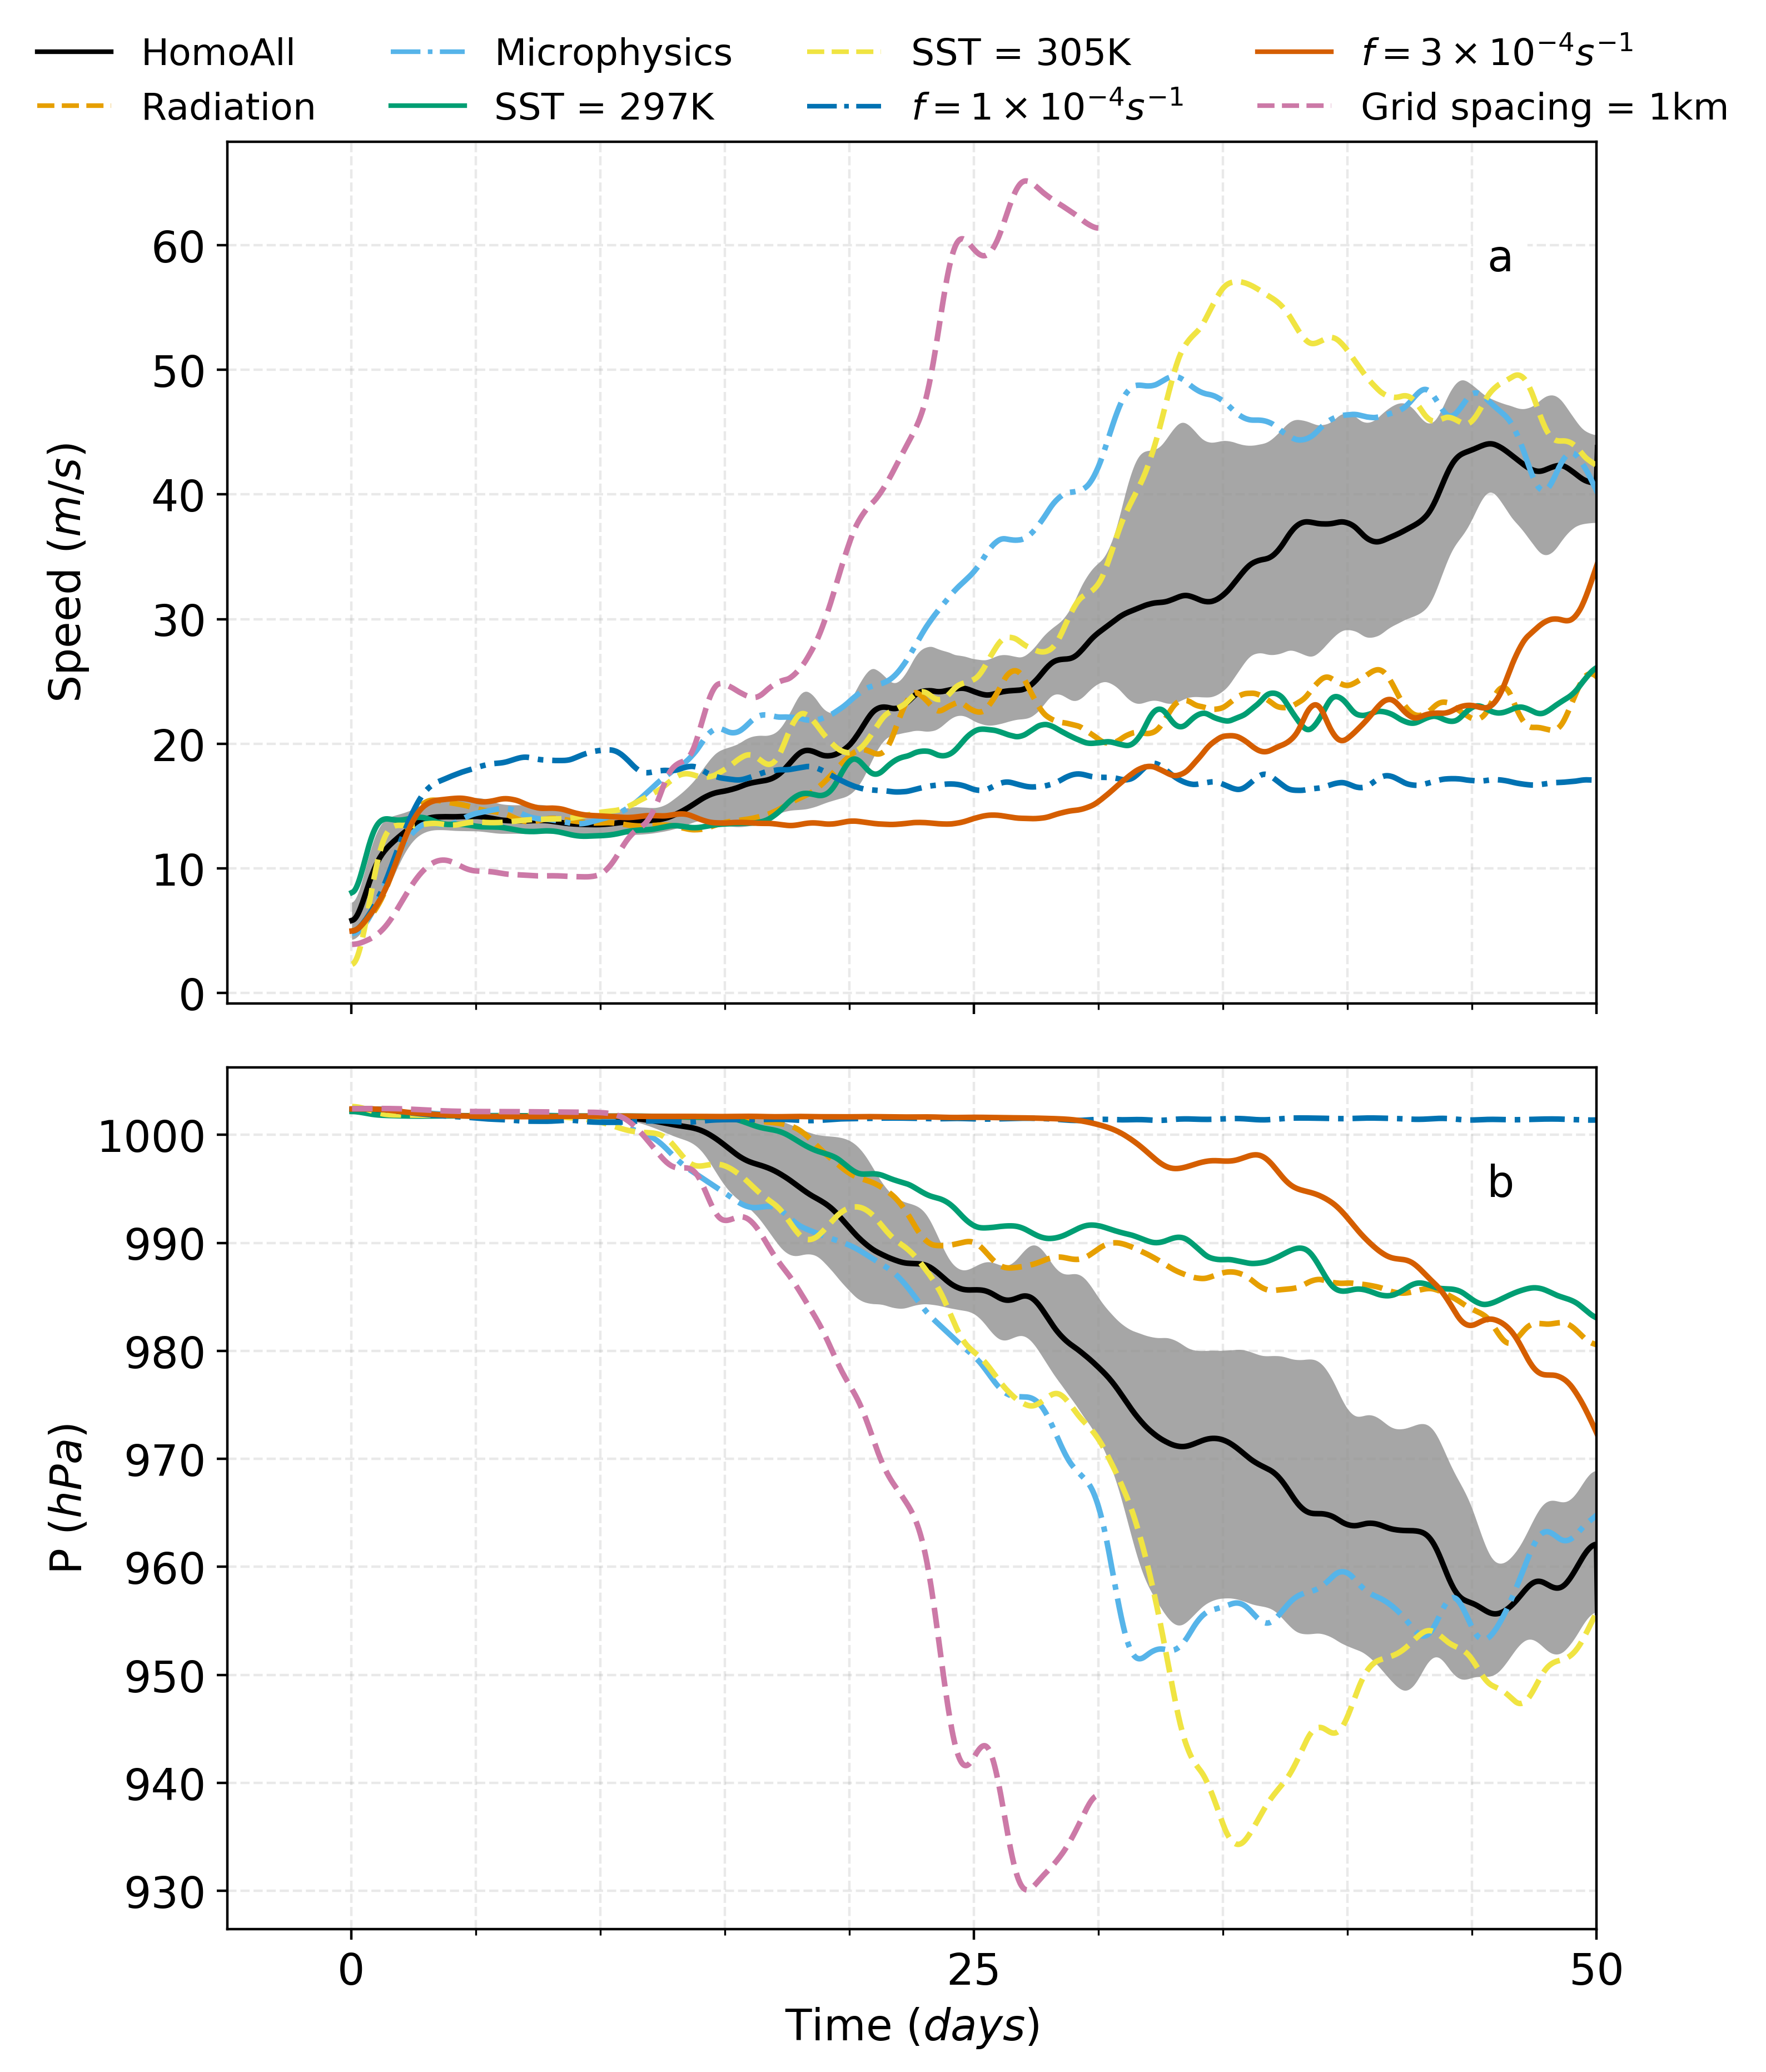

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

In [58]:
PyPlot.matplotlib.rc("font", family="sans-serif",size=14)
time_smooth = 21 #21
times_to_smooth=3 #5
##########
fig, ax = plt.subplots(2,1,sharex=true,figsize=(2*3.74,2*4.5),dpi=400)
p1, = ax[1].plot(times,vcat(filter_n_times(sp_ensemble_mean,time_smooth,times_to_smooth),filter_n_times(sp_homoRad_homoSfc_control[ensemble_length+1:end],time_smooth,times_to_smooth)),label="HomoAll")#,c=vec(p1.get_facecolor()),alpha=1)
p2 = ax[1].fill_between(times[1:end÷2],filter_n_times(sp_ensemble_min,time_smooth,times_to_smooth),filter_n_times(sp_ensemble_max,time_smooth,times_to_smooth),label="_nolegend_",alpha=0.35,facecolor=p1.get_color())
p3 = ax[1].plot(times,filter_n_times(sp_homoRad_homoSfc_rrtm,time_smooth,times_to_smooth),label="Radiation")
p4 = ax[1].plot(times,filter_n_times(sp_homoRad_homoSfc_thom,time_smooth,times_to_smooth),label="Microphysics")
p5 = ax[1].plot(times,filter_n_times(sp_homoRad_homoSfc_297K,time_smooth,times_to_smooth),label="SST = 297K")
p6 = ax[1].plot(times,filter_n_times(sp_homoRad_homoSfc_305K,time_smooth,times_to_smooth),label="SST = 305K")
p7 = ax[1].plot(times,filter_n_times(sp_homoRad_homoSfc_f1,time_smooth,times_to_smooth),label=L"f = 1\times 10 ^{-4}s^{-1}")
p8 = ax[1].plot(times,filter_n_times(sp_homoRad_homoSfc_f3,time_smooth,times_to_smooth),label=L"f = 3\times 10 ^{-4}s^{-1}")
p9 = ax[1].plot(times[1:720],filter_n_times(sp_homoRad_homoSfc_1km,time_smooth,times_to_smooth),label="Grid spacing = 1km")
#p10 = ax[1].plot(times[1:1200],filter_n_times(sp_homoRad_homoSfc_nonudge,time_smooth,times_to_smooth),label="No wind nudging")
#p8 = ax[1].plot(times_sp_f3,sp_f3,label="Coriolis f3")
ax[1].set_ylabel(string("Speed ",L"(m/s)"))

#######################
p1, = ax[2].plot(times,vcat(filter_n_times(pres_ensemble_mean,time_smooth,times_to_smooth),filter_n_times(pres_homoRad_homoSfc_control[ensemble_length+1:end],time_smooth,times_to_smooth)),label="HomoAll")
p2 = ax[2].fill_between(times[1:end÷2],filter_n_times(pres_ensemble_min,time_smooth,times_to_smooth),filter_n_times(pres_ensemble_max,time_smooth,times_to_smooth),label="_nolegend_",facecolor=p1.get_color(),alpha=0.35)
p3 = ax[2].plot(times,filter_n_times(pres_homoRad_homoSfc_rrtm,time_smooth,times_to_smooth),label="Radiation")
p4 = ax[2].plot(times,filter_n_times(pres_homoRad_homoSfc_thom,time_smooth,times_to_smooth),label="Microphysics")
p5 = ax[2].plot(times,filter_n_times(pres_homoRad_homoSfc_297K,time_smooth,times_to_smooth),label="Temperature 297")
p6 = ax[2].plot(times,filter_n_times(pres_homoRad_homoSfc_305K,time_smooth,times_to_smooth),label="Temperature 305")
p7 = ax[2].plot(times,filter_n_times(pres_homoRad_homoSfc_f1,time_smooth,times_to_smooth),label="Coriolis f1")
p8 = ax[2].plot(times,filter_n_times(pres_homoRad_homoSfc_f3,time_smooth,times_to_smooth),label="Coriolis f3")
p9 = ax[2].plot(times[1:720],filter_n_times(pres_homoRad_homoSfc_1km,time_smooth,times_to_smooth),label=L"Grid spacing = 1km")
#p10 = ax[2].plot(times[1:1200],filter_n_times(pres_homoRad_homoSfc_nonudge,time_smooth,times_to_smooth),label="No wind nudging")

#p8 = ax[2].plot(times_pres_f3,pres_f3,label="Coriolis f3")
ax[2].set_ylabel(string("P ",L"(hPa)"))

#######################
xlim(right=50)
ax[2].set_xlabel(string("Time ",L"(days)"))
ax[1].yaxis.set_label_coords(-0.1,0.5)
ax[1].minorticks_on()
ax[1].grid(b=true,which="both",color="xkcd:gray", linestyle="--",alpha=0.3)
ax[2].yaxis.set_label_coords(-0.1,0.5)
ax[1].annotate("a", xy=(0.92, 0.85), xycoords="axes fraction",backgroundcolor="white")
ax[2].annotate("b", xy=(0.92, 0.85), xycoords="axes fraction",backgroundcolor="white")
plt.tight_layout()
ax[1].legend(loc = (-0.15, 1), ncol=4 ,frameon=false,fontsize=12)
lw = 1.8
[ln.set_linewidth(lw) for i in 1:length(ax) for ln in ax[i].lines ]
ax[1].xaxis.set_minor_locator(tkr.MultipleLocator(5))
ax[1].xaxis.set_major_locator(tkr.MultipleLocator(25))
ax[1].yaxis.set_minor_locator(plt.NullLocator())
ax[1].grid(b=true,which="both",color="xkcd:gray", linestyle="--",alpha=0.2)
ax[2].xaxis.set_minor_locator(tkr.MultipleLocator(5))
ax[2].grid(b=true,which="both",color="xkcd:gray", linestyle="--",alpha=0.2)
savefig(joinpath(output_dir,"time_comparisons_sensitivity_with1km.png"), bbox_inches="tight")
savefig(joinpath(output_dir,"time_comparisons_sensitivity_with1km.eps"), bbox_inches="tight")
savefig(joinpath(output_dir,"time_comparisons_sensitivity_with1km.pdf"), bbox_inches="tight")

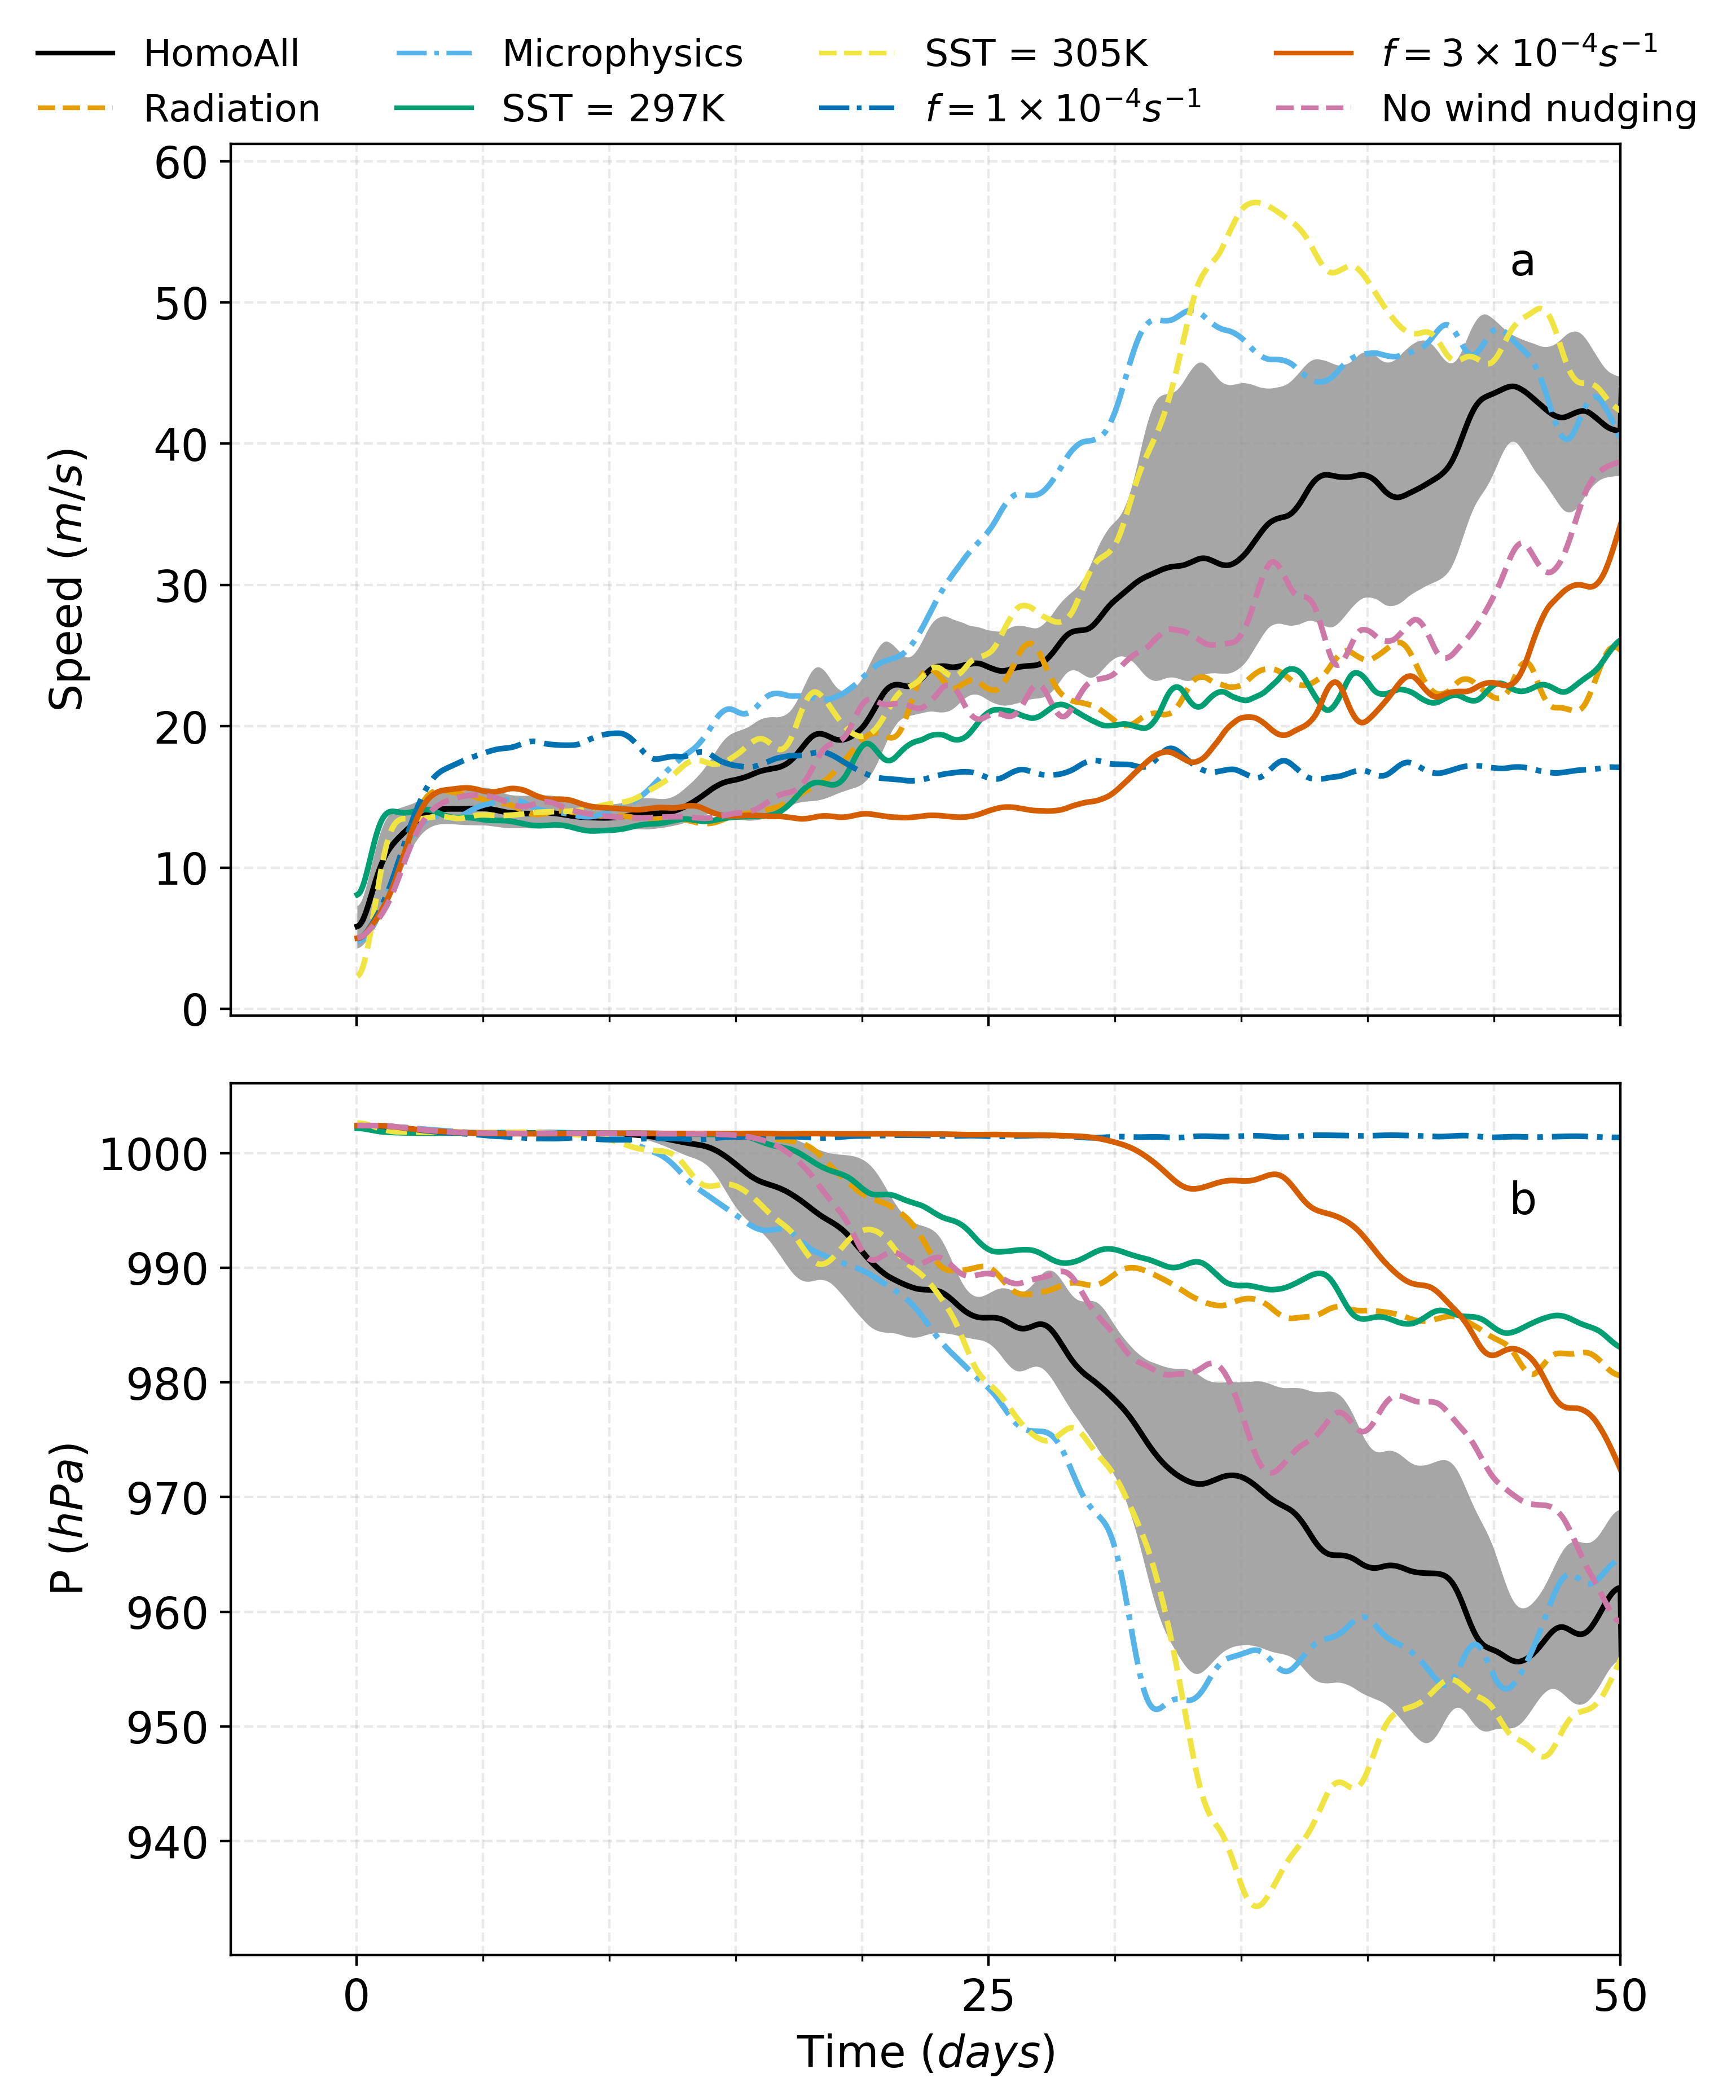

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

In [59]:
PyPlot.matplotlib.rc("font", family="sans-serif",size=14)
time_smooth = 21 #21
times_to_smooth=3 #5
##########
fig, ax = plt.subplots(2,1,sharex=true,figsize=(2*3.74,2*4.5),dpi=400)
p1, = ax[1].plot(times,vcat(filter_n_times(sp_ensemble_mean,time_smooth,times_to_smooth),filter_n_times(sp_homoRad_homoSfc_control[ensemble_length+1:end],time_smooth,times_to_smooth)),label="HomoAll")#,c=vec(p1.get_facecolor()),alpha=1)
p2 = ax[1].fill_between(times[1:end÷2],filter_n_times(sp_ensemble_min,time_smooth,times_to_smooth),filter_n_times(sp_ensemble_max,time_smooth,times_to_smooth),label="_nolegend_",alpha=0.35,facecolor=p1.get_color())
p3 = ax[1].plot(times,filter_n_times(sp_homoRad_homoSfc_rrtm,time_smooth,times_to_smooth),label="Radiation")
p4 = ax[1].plot(times,filter_n_times(sp_homoRad_homoSfc_thom,time_smooth,times_to_smooth),label="Microphysics")
p5 = ax[1].plot(times,filter_n_times(sp_homoRad_homoSfc_297K,time_smooth,times_to_smooth),label="SST = 297K")
p6 = ax[1].plot(times,filter_n_times(sp_homoRad_homoSfc_305K,time_smooth,times_to_smooth),label="SST = 305K")
p7 = ax[1].plot(times,filter_n_times(sp_homoRad_homoSfc_f1,time_smooth,times_to_smooth),label=L"f = 1\times 10 ^{-4}s^{-1}")
p8 = ax[1].plot(times,filter_n_times(sp_homoRad_homoSfc_f3,time_smooth,times_to_smooth),label=L"f = 3\times 10 ^{-4}s^{-1}")
#p9 = ax[1].plot(times[1:720],filter_n_times(sp_homoRad_homoSfc_1km,time_smooth,times_to_smooth),label="Grid spacing = 1km")
p10 = ax[1].plot(times[1:1200],filter_n_times(sp_homoRad_homoSfc_nonudge,time_smooth,times_to_smooth),label="No wind nudging")

#p8 = ax[1].plot(times_sp_f3,sp_f3,label="Coriolis f3")
ax[1].set_ylabel(string("Speed ",L"(m/s)"))

#######################
p1, = ax[2].plot(times,vcat(filter_n_times(pres_ensemble_mean,time_smooth,times_to_smooth),filter_n_times(pres_homoRad_homoSfc_control[ensemble_length+1:end],time_smooth,times_to_smooth)),label="HomoAll")
p2 = ax[2].fill_between(times[1:end÷2],filter_n_times(pres_ensemble_min,time_smooth,times_to_smooth),filter_n_times(pres_ensemble_max,time_smooth,times_to_smooth),label="_nolegend_",facecolor=p1.get_color(),alpha=0.35)
p3 = ax[2].plot(times,filter_n_times(pres_homoRad_homoSfc_rrtm,time_smooth,times_to_smooth),label="Radiation")
p4 = ax[2].plot(times,filter_n_times(pres_homoRad_homoSfc_thom,time_smooth,times_to_smooth),label="Microphysics")
p5 = ax[2].plot(times,filter_n_times(pres_homoRad_homoSfc_297K,time_smooth,times_to_smooth),label="Temperature 297")
p6 = ax[2].plot(times,filter_n_times(pres_homoRad_homoSfc_305K,time_smooth,times_to_smooth),label="Temperature 305")
p7 = ax[2].plot(times,filter_n_times(pres_homoRad_homoSfc_f1,time_smooth,times_to_smooth),label="Coriolis f1")
p8 = ax[2].plot(times,filter_n_times(pres_homoRad_homoSfc_f3,time_smooth,times_to_smooth),label="Coriolis f3")
p10 = ax[2].plot(times[1:1200],filter_n_times(pres_homoRad_homoSfc_nonudge,time_smooth,times_to_smooth),label="No wind nudging")

#p9 = ax[2].plot(times[1:720],filter_n_times(pres_homoRad_homoSfc_1km,time_smooth,times_to_smooth),label=L"Grid spacing = 1km")
#p8 = ax[2].plot(times_pres_f3,pres_f3,label="Coriolis f3")
ax[2].set_ylabel(string("P ",L"(hPa)"))

#######################
xlim(right=50)
ax[2].set_xlabel(string("Time ",L"(days)"))
ax[1].yaxis.set_label_coords(-0.1,0.5)
ax[1].minorticks_on()
ax[1].grid(b=true,which="both",color="xkcd:gray", linestyle="--",alpha=0.3)
ax[2].yaxis.set_label_coords(-0.1,0.5)
ax[1].annotate("a", xy=(0.92, 0.85), xycoords="axes fraction",backgroundcolor="white")
ax[2].annotate("b", xy=(0.92, 0.85), xycoords="axes fraction",backgroundcolor="white")
plt.tight_layout()
ax[1].legend(loc = (-0.15, 1), ncol=4 ,frameon=false,fontsize=12)
lw = 1.8
[ln.set_linewidth(lw) for i in 1:length(ax) for ln in ax[i].lines ]
ax[1].xaxis.set_minor_locator(tkr.MultipleLocator(5))
ax[1].xaxis.set_major_locator(tkr.MultipleLocator(25))
ax[1].yaxis.set_minor_locator(plt.NullLocator())
ax[1].grid(b=true,which="both",color="xkcd:gray", linestyle="--",alpha=0.2)
ax[2].xaxis.set_minor_locator(tkr.MultipleLocator(5))
ax[2].grid(b=true,which="both",color="xkcd:gray", linestyle="--",alpha=0.2)
savefig(joinpath(output_dir,"time_comparisons_sensitivity_without1km_nonudge.png"), bbox_inches="tight")
savefig(joinpath(output_dir,"time_comparisons_sensitivity_without1km_nonudge.eps"), bbox_inches="tight")
savefig(joinpath(output_dir,"time_comparisons_sensitivity_without1km_nonudge.pdf"), bbox_inches="tight")

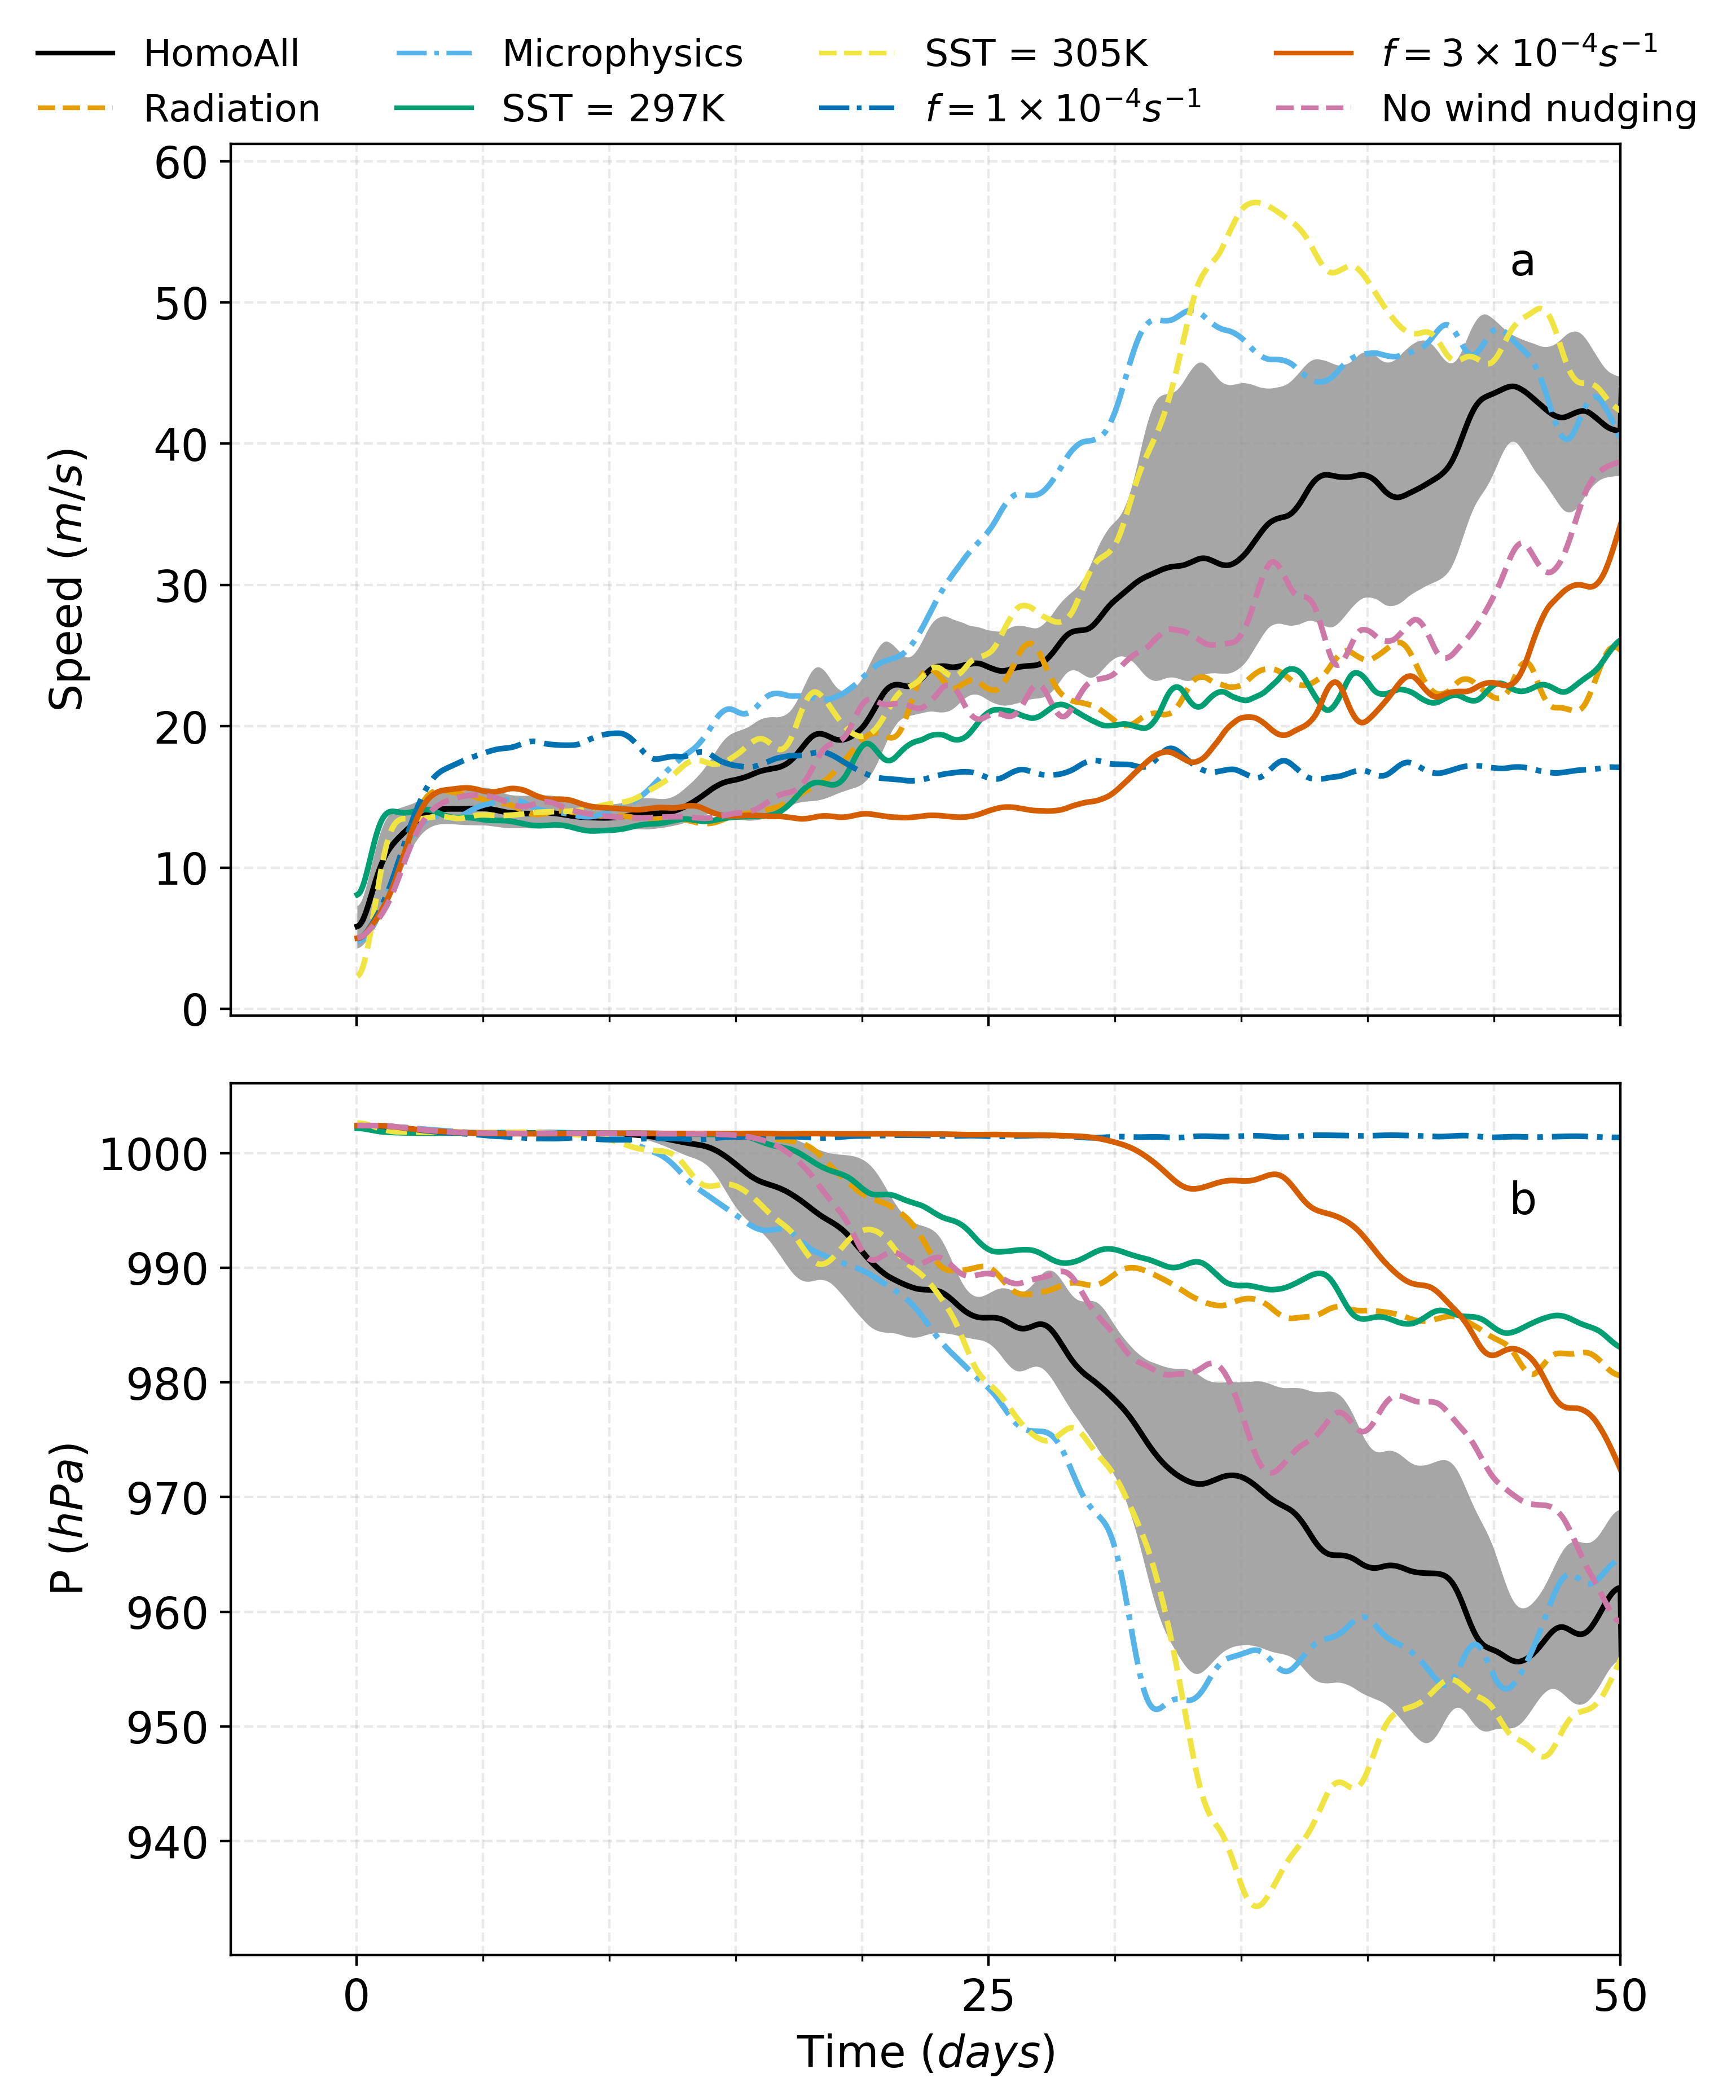

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

In [60]:
PyPlot.matplotlib.rc("font", family="sans-serif",size=14)
time_smooth = 21 #21
times_to_smooth=3 #5
##########
fig, ax = plt.subplots(2,1,sharex=true,figsize=(2*3.74,2*4.5),dpi=400)
p1, = ax[1].plot(times,vcat(filter_n_times(sp_ensemble_mean,time_smooth,times_to_smooth),filter_n_times(sp_homoRad_homoSfc_control[ensemble_length+1:end],time_smooth,times_to_smooth)),label="HomoAll")#,c=vec(p1.get_facecolor()),alpha=1)
p2 = ax[1].fill_between(times[1:end÷2],filter_n_times(sp_ensemble_min,time_smooth,times_to_smooth),filter_n_times(sp_ensemble_max,time_smooth,times_to_smooth),label="_nolegend_",alpha=0.35,facecolor=p1.get_color())
p3 = ax[1].plot(times,filter_n_times(sp_homoRad_homoSfc_rrtm,time_smooth,times_to_smooth),label="Radiation")
p4 = ax[1].plot(times,filter_n_times(sp_homoRad_homoSfc_thom,time_smooth,times_to_smooth),label="Microphysics")
p5 = ax[1].plot(times,filter_n_times(sp_homoRad_homoSfc_297K,time_smooth,times_to_smooth),label="SST = 297K")
p6 = ax[1].plot(times,filter_n_times(sp_homoRad_homoSfc_305K,time_smooth,times_to_smooth),label="SST = 305K")
p7 = ax[1].plot(times,filter_n_times(sp_homoRad_homoSfc_f1,time_smooth,times_to_smooth),label=L"f = 1\times 10 ^{-4}s^{-1}")
p8 = ax[1].plot(times,filter_n_times(sp_homoRad_homoSfc_f3,time_smooth,times_to_smooth),label=L"f = 3\times 10 ^{-4}s^{-1}")
#p9 = ax[1].plot(times[1:720],filter_n_times(sp_homoRad_homoSfc_1km,time_smooth,times_to_smooth),label="Grid spacing = 1km")
p10 = ax[1].plot(times[1:1200],filter_n_times(sp_homoRad_homoSfc_nonudge,time_smooth,times_to_smooth),label="No wind nudging")
#p8 = ax[1].plot(times_sp_f3,sp_f3,label="Coriolis f3")
ax[1].set_ylabel(string("Speed ",L"(m/s)"))

#######################
p1, = ax[2].plot(times,vcat(filter_n_times(pres_ensemble_mean,time_smooth,times_to_smooth),filter_n_times(pres_homoRad_homoSfc_control[ensemble_length+1:end],time_smooth,times_to_smooth)),label="HomoAll")
p2 = ax[2].fill_between(times[1:end÷2],filter_n_times(pres_ensemble_min,time_smooth,times_to_smooth),filter_n_times(pres_ensemble_max,time_smooth,times_to_smooth),label="_nolegend_",facecolor=p1.get_color(),alpha=0.35)
p3 = ax[2].plot(times,filter_n_times(pres_homoRad_homoSfc_rrtm,time_smooth,times_to_smooth),label="Radiation")
p4 = ax[2].plot(times,filter_n_times(pres_homoRad_homoSfc_thom,time_smooth,times_to_smooth),label="Microphysics")
p5 = ax[2].plot(times,filter_n_times(pres_homoRad_homoSfc_297K,time_smooth,times_to_smooth),label="Temperature 297")
p6 = ax[2].plot(times,filter_n_times(pres_homoRad_homoSfc_305K,time_smooth,times_to_smooth),label="Temperature 305")
p7 = ax[2].plot(times,filter_n_times(pres_homoRad_homoSfc_f1,time_smooth,times_to_smooth),label="Coriolis f1")
p8 = ax[2].plot(times,filter_n_times(pres_homoRad_homoSfc_f3,time_smooth,times_to_smooth),label="Coriolis f3")
#p9 = ax[2].plot(times[1:720],filter_n_times(pres_homoRad_homoSfc_1km,time_smooth,times_to_smooth),label=L"Grid spacing = 1km")
p10 = ax[2].plot(times[1:1200],filter_n_times(pres_homoRad_homoSfc_nonudge,time_smooth,times_to_smooth),label="No wind nudging")

#p8 = ax[2].plot(times_pres_f3,pres_f3,label="Coriolis f3")
ax[2].set_ylabel(string("P ",L"(hPa)"))

#######################
xlim(right=50)
ax[2].set_xlabel(string("Time ",L"(days)"))
ax[1].yaxis.set_label_coords(-0.1,0.5)
ax[1].minorticks_on()
ax[1].grid(b=true,which="both",color="xkcd:gray", linestyle="--",alpha=0.3)
ax[2].yaxis.set_label_coords(-0.1,0.5)
ax[1].annotate("a", xy=(0.92, 0.85), xycoords="axes fraction",backgroundcolor="white")
ax[2].annotate("b", xy=(0.92, 0.85), xycoords="axes fraction",backgroundcolor="white")
plt.tight_layout()
ax[1].legend(loc = (-0.15, 1), ncol=4 ,frameon=false,fontsize=12)
lw = 1.8
[ln.set_linewidth(lw) for i in 1:length(ax) for ln in ax[i].lines ]
ax[1].xaxis.set_minor_locator(tkr.MultipleLocator(5))
ax[1].xaxis.set_major_locator(tkr.MultipleLocator(25))
ax[1].yaxis.set_minor_locator(plt.NullLocator())
ax[1].grid(b=true,which="both",color="xkcd:gray", linestyle="--",alpha=0.2)
ax[2].xaxis.set_minor_locator(tkr.MultipleLocator(5))
ax[2].grid(b=true,which="both",color="xkcd:gray", linestyle="--",alpha=0.2)
savefig(joinpath(output_dir,"time_comparisons_sensitivity_without1km.png"), bbox_inches="tight")
savefig(joinpath(output_dir,"time_comparisons_sensitivity_without1km.eps"), bbox_inches="tight")
savefig(joinpath(output_dir,"time_comparisons_sensitivity_without1km.pdf"), bbox_inches="tight")

In [12]:
pres_homoRad_homoSfc_control_2days,sp_homoRad_homoSfc_control_2days = get_timeseries_2days(joinpath(data_dir,"f5e-4_2km_1000km_homoRad_homoSfc_2d.nc"));

In [13]:
pres_homoRad_homoSfc_ens1_2days,sp_homoRad_homoSfc_ens1_2days = get_timeseries_2days(joinpath(data_dir,"f5e-4_2km_1000km_homoRad_homoSfc_ensemble1_2d.nc"));

In [14]:
pres_homoRad_homoSfc_ens2_2days,sp_homoRad_homoSfc_ens2_2days = get_timeseries_2days(joinpath(data_dir,"f5e-4_2km_1000km_homoRad_homoSfc_ensemble2_2d.nc"));;

In [15]:
pres_homoRad_homoSfc_rrtm_2days,sp_homoRad_homoSfc_rrtm_2days = get_timeseries_2days(joinpath(data_dir,"f5e-4_2km_1000km_homoRad_homoSfc_RRTM_2d.nc"));

In [16]:
pres_homoRad_homoSfc_thom_2days,sp_homoRad_homoSfc_thom_2days = get_timeseries_2days(joinpath(data_dir,"f5e-4_2km_1000km_homoRad_homoSfc_MICRO_THOM_2d.nc"));

In [17]:
pres_homoRad_homoSfc_297K_2days,sp_homoRad_homoSfc_297K_2days = get_timeseries_2days(joinpath(data_dir,"f5e-4_2km_1000km_homoRad_homoSfc_297K_2d.nc"));

In [18]:
pres_homoRad_homoSfc_f3_2days,sp_homoRad_homoSfc_f3_2days = get_timeseries_2days(joinpath(data_dir,"f3e-4_2km_1000km_homoRad_homoSfc_2d.nc"));

In [19]:
pres_homoRad_homoSfc_f1_2days,sp_homoRad_homoSfc_f1_2days = get_timeseries_2days(joinpath(data_dir,"f1e-4_2km_1000km_homoRad_homoSfc_2d.nc"));

In [20]:
pres_homoRad_homoSfc_305K_2days,sp_homoRad_homoSfc_305K_2days = get_timeseries_2days(joinpath(data_dir,"f5e-4_2km_1000km_homoRad_homoSfc_305K_2d.nc"));

In [21]:
pres_homoRad_homoSfc_1km_2days,sp_homoRad_homoSfc_1km_2days = get_timeseries_2days(joinpath(data_dir,"f5e-4_1km_1000km_homoRad_homoSfc_2d.nc"));

In [22]:
pres_homoRad_homoSfc_nonudge_2days,sp_homoRad_homoSfc_nonudge_2days = get_timeseries_2days(joinpath(data_dir,"f5e-4_2km_1000km_homoRad_homoSfc_nonudge_2d.nc"));

In [23]:
times = Dataset(joinpath(data_dir,"f5e-4_2km_1000km_homoRad_homoSfc_2d.nc")) do ds
	variable(ds,"time")[1:24]
    end;

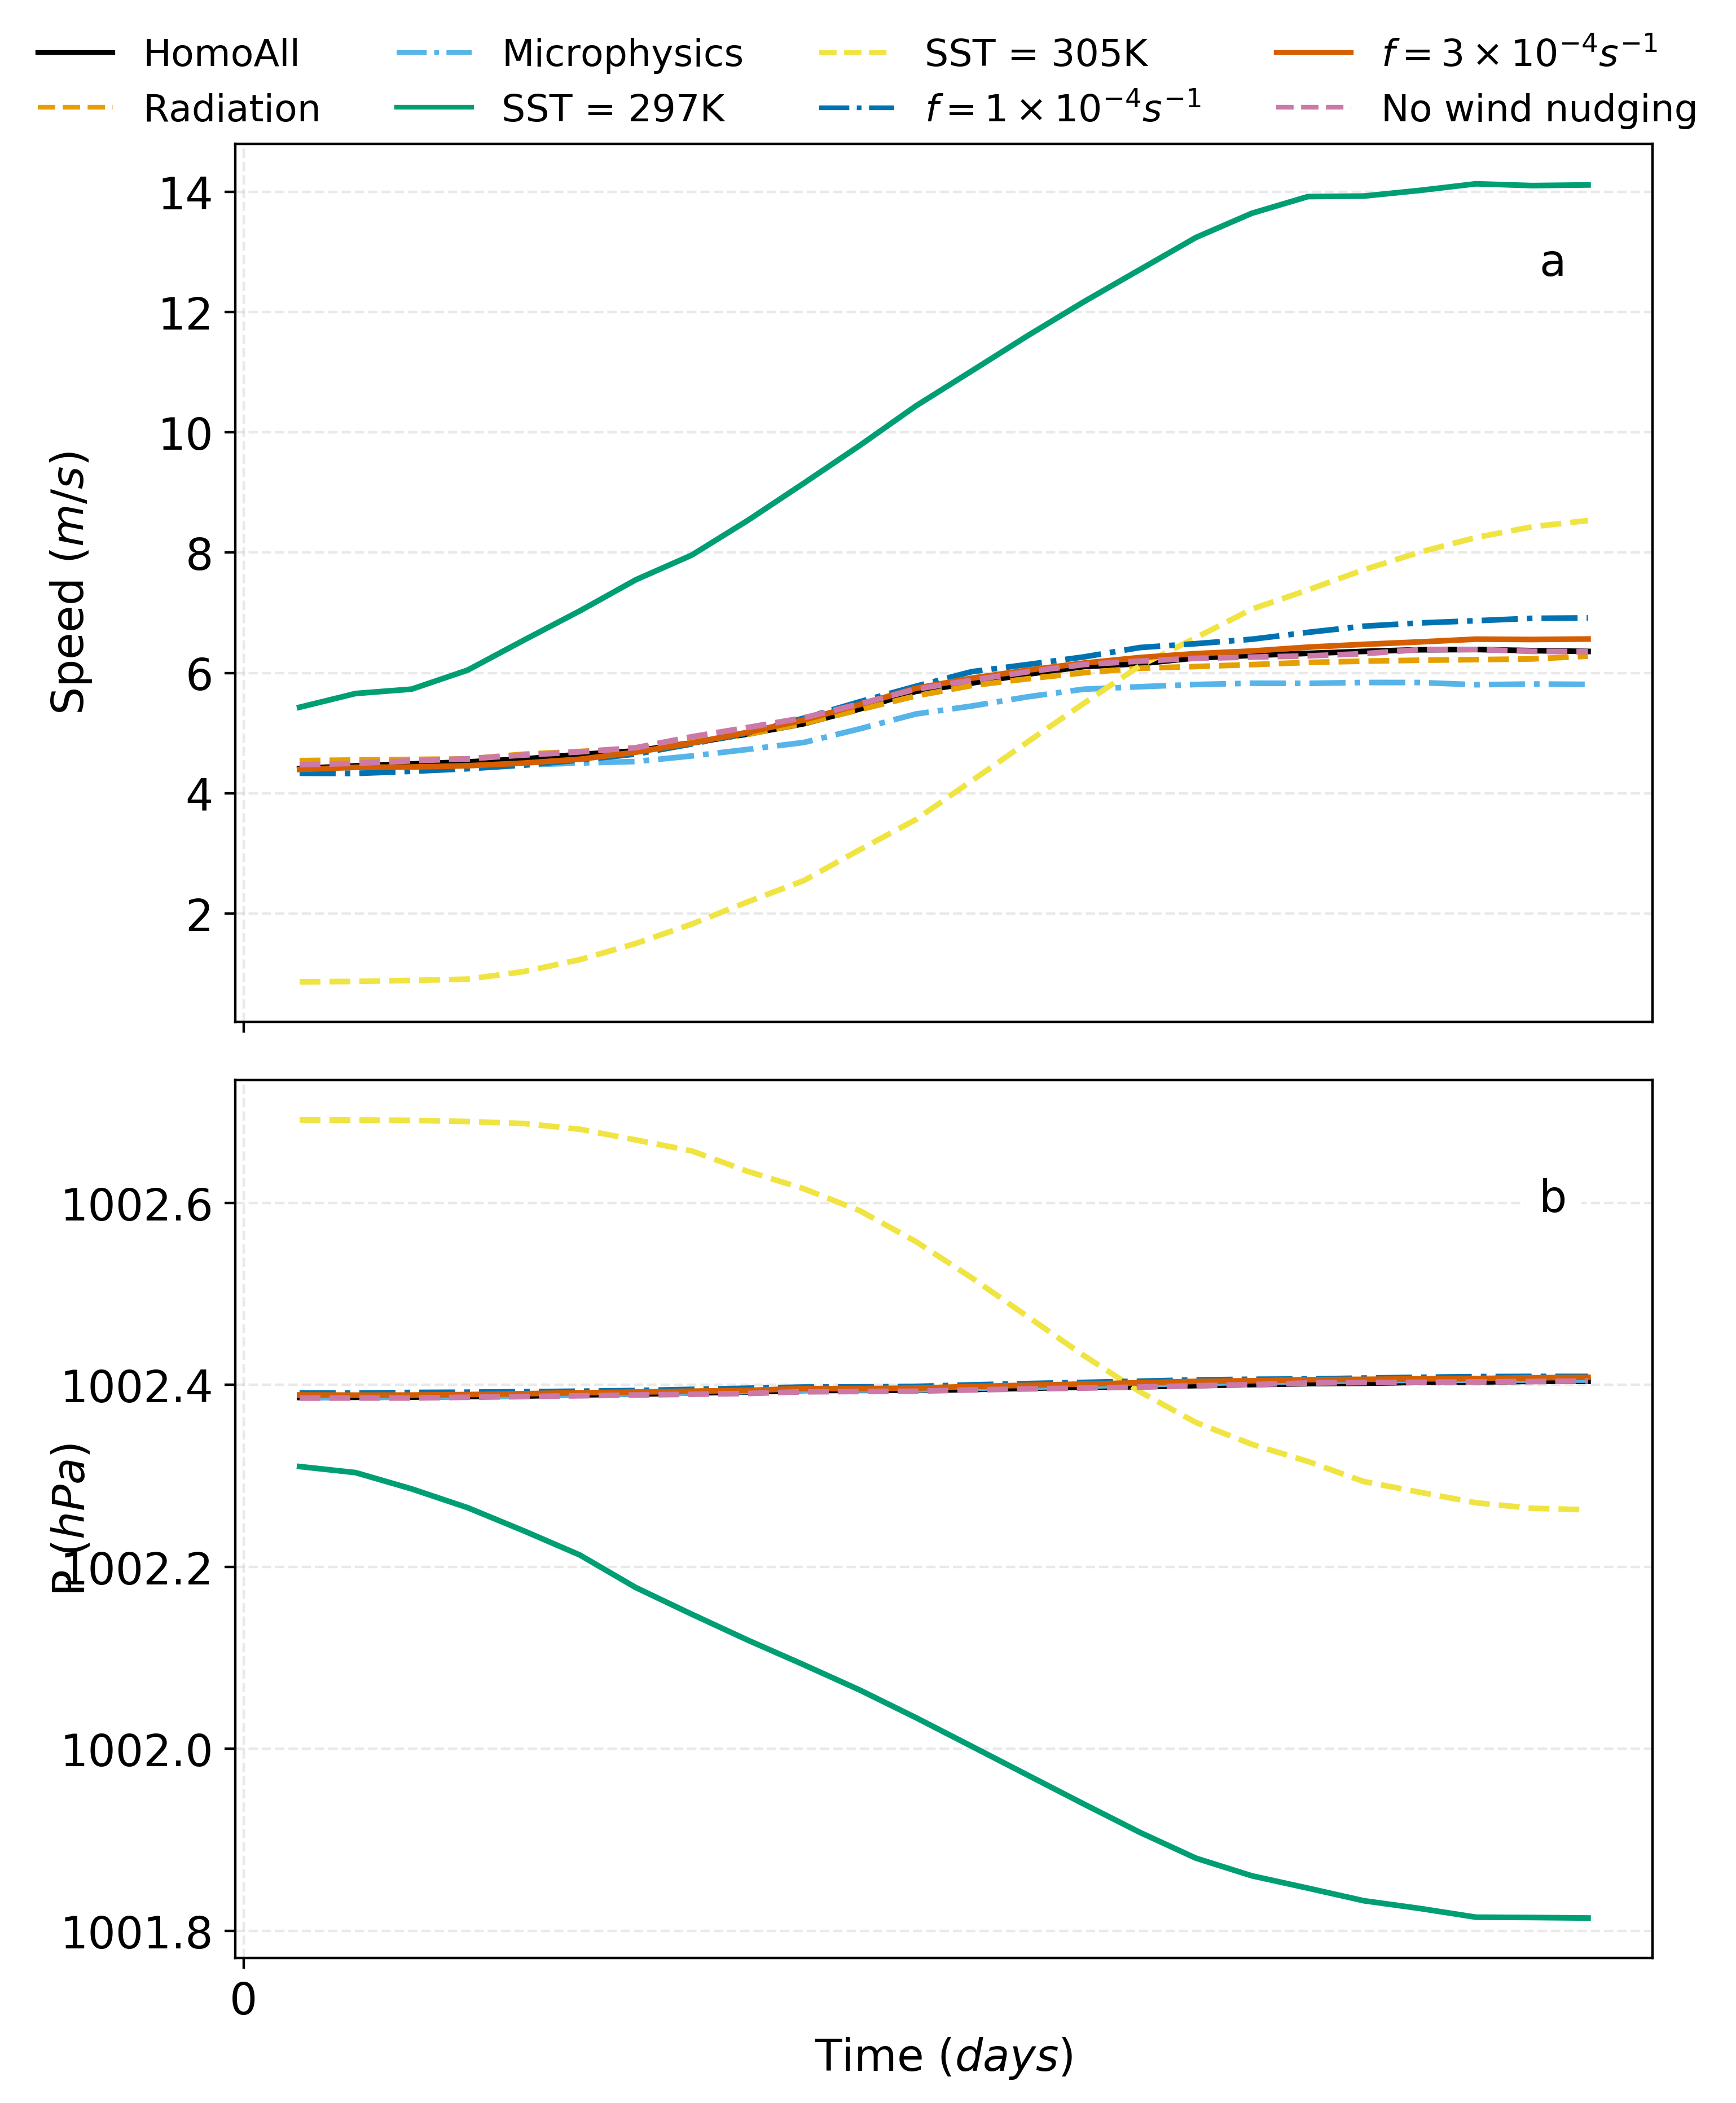

In [26]:
PyPlot.matplotlib.rc("font", family="sans-serif",size=14)
time_smooth = 21 #21
times_to_smooth=0 #5
##########
fig, ax = plt.subplots(2,1,sharex=true,figsize=(2*3.74,2*4.5),dpi=400)
p1, = ax[1].plot(times,filter_n_times(sp_homoRad_homoSfc_control_2days,time_smooth,times_to_smooth),label="HomoAll")#,c=vec(p1.get_facecolor()),alpha=1)
#p2 = ax[1].fill_between(times[1:end÷2],filter_n_times(sp_ensemble_min,time_smooth,times_to_smooth),filter_n_times(sp_ensemble_max,time_smooth,times_to_smooth),label="_nolegend_",alpha=0.35,facecolor=p1.get_color())
p3 = ax[1].plot(times,filter_n_times(sp_homoRad_homoSfc_rrtm_2days,time_smooth,times_to_smooth),label="Radiation")
p4 = ax[1].plot(times,filter_n_times(sp_homoRad_homoSfc_thom_2days,time_smooth,times_to_smooth),label="Microphysics")
p5 = ax[1].plot(times,filter_n_times(sp_homoRad_homoSfc_297K_2days,time_smooth,times_to_smooth),label="SST = 297K")
p6 = ax[1].plot(times,filter_n_times(sp_homoRad_homoSfc_305K_2days,time_smooth,times_to_smooth),label="SST = 305K")
p7 = ax[1].plot(times,filter_n_times(sp_homoRad_homoSfc_f1_2days,time_smooth,times_to_smooth),label=L"f = 1\times 10 ^{-4}s^{-1}")
p8 = ax[1].plot(times,filter_n_times(sp_homoRad_homoSfc_f3_2days,time_smooth,times_to_smooth),label=L"f = 3\times 10 ^{-4}s^{-1}")
#p9 = ax[1].plot(times[1:720],filter_n_times(sp_homoRad_homoSfc_1km,time_smooth,times_to_smooth),label="Grid spacing = 1km")
p10 = ax[1].plot(times,filter_n_times(sp_homoRad_homoSfc_nonudge_2days,time_smooth,times_to_smooth),label="No wind nudging")
#p8 = ax[1].plot(times_sp_f3,sp_f3,label="Coriolis f3")
ax[1].set_ylabel(string("Speed ",L"(m/s)"))

#######################
p1, = ax[2].plot(times,filter_n_times(pres_homoRad_homoSfc_control_2days,time_smooth,times_to_smooth),label="HomoAll")
#p2 = ax[2].fill_between(times[1:end÷2],filter_n_times(pres_ensemble_min,time_smooth,times_to_smooth),filter_n_times(pres_ensemble_max,time_smooth,times_to_smooth),label="_nolegend_",facecolor=p1.get_color(),alpha=0.35)
p3 = ax[2].plot(times,filter_n_times(pres_homoRad_homoSfc_rrtm_2days,time_smooth,times_to_smooth),label="Radiation")
p4 = ax[2].plot(times,filter_n_times(pres_homoRad_homoSfc_thom_2days,time_smooth,times_to_smooth),label="Microphysics")
p5 = ax[2].plot(times,filter_n_times(pres_homoRad_homoSfc_297K_2days,time_smooth,times_to_smooth),label="Temperature 297")
p6 = ax[2].plot(times,filter_n_times(pres_homoRad_homoSfc_305K_2days,time_smooth,times_to_smooth),label="Temperature 305")
p7 = ax[2].plot(times,filter_n_times(pres_homoRad_homoSfc_f1_2days,time_smooth,times_to_smooth),label="Coriolis f1")
p8 = ax[2].plot(times,filter_n_times(pres_homoRad_homoSfc_f3_2days,time_smooth,times_to_smooth),label="Coriolis f3")
#p9 = ax[2].plot(times[1:720],filter_n_times(pres_homoRad_homoSfc_1km,time_smooth,times_to_smooth),label=L"Grid spacing = 1km")
p10 = ax[2].plot(times,filter_n_times(pres_homoRad_homoSfc_nonudge_2days,time_smooth,times_to_smooth),label="No wind nudging")

#p8 = ax[2].plot(times_pres_f3,pres_f3,label="Coriolis f3")
ax[2].set_ylabel(string("P ",L"(hPa)"))

#######################
#xlim(right=50)
ax[2].set_xlabel(string("Time ",L"(days)"))
ax[1].yaxis.set_label_coords(-0.1,0.5)
ax[1].minorticks_on()
ax[1].grid(b=true,which="both",color="xkcd:gray", linestyle="--",alpha=0.3)
ax[2].yaxis.set_label_coords(-0.1,0.5)
ax[1].annotate("a", xy=(0.92, 0.85), xycoords="axes fraction",backgroundcolor="white")
ax[2].annotate("b", xy=(0.92, 0.85), xycoords="axes fraction",backgroundcolor="white")
plt.tight_layout()
ax[1].legend(loc = (-0.15, 1), ncol=4 ,frameon=false,fontsize=12)
lw = 1.8
[ln.set_linewidth(lw) for i in 1:length(ax) for ln in ax[i].lines ]
ax[1].xaxis.set_minor_locator(tkr.MultipleLocator(5))
ax[1].xaxis.set_major_locator(tkr.MultipleLocator(25))
ax[1].yaxis.set_minor_locator(plt.NullLocator())
ax[1].grid(b=true,which="both",color="xkcd:gray", linestyle="--",alpha=0.2)
ax[2].xaxis.set_minor_locator(tkr.MultipleLocator(5))
ax[2].grid(b=true,which="both",color="xkcd:gray", linestyle="--",alpha=0.2)
#savefig(joinpath(output_dir,"time_comparisons_sensitivity_nosmoothing.png"), bbox_inches="tight")
#savefig(joinpath(output_dir,"time_comparisons_sensitivity_nosmoothing.eps"), bbox_inches="tight")
#savefig(joinpath(output_dir,"time_comparisons_sensitivity_nosmoothing.pdf"), bbox_inches="tight")